In [1]:
import sympy
sympy.init_printing()
%matplotlib inline

# Multivariable Stability analysis

In [2]:
s = sympy.Symbol('s')

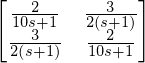

In [3]:
Gp = sympy.Matrix([[2/(10*s + 1), sympy.Rational('1.5')/(s + 1)],
                   [sympy.Rational('1.5')/(s + 1), 2/(10*s + 1)]])
Gp

In [4]:
K_c1, K_c2 = sympy.symbols('K_c1, K_c2')

In [5]:
Gc = sympy.Matrix([[K_c1, 0],
                   [0, K_c2]])

For the off-diagonal case:

In [6]:
# Gc = sympy.Matrix([[0, K_c2],
#                    [K_c1, 0]])

In [7]:
I = sympy.Matrix([[1, 0],
                  [0, 1]])

In [8]:
charpoly = sympy.poly(sympy.numer((I + Gp*Gc).det().together()), s)

In [9]:
for i, a in enumerate(charpoly.all_coeffs()):
    print(i, a)

0 400
1 80*K_c1 + 80*K_c2 + 880
2 -884*K_c1*K_c2 + 168*K_c1 + 168*K_c2 + 564
3 -148*K_c1*K_c2 + 96*K_c1 + 96*K_c2 + 88
4 7*K_c1*K_c2 + 8*K_c1 + 8*K_c2 + 4


In [10]:
from routh import routh

In [1]:
!cat routh.py

import sympy

def routh(p):
    """ Construct the Routh-Hurwitz array given a polynomial in s"""
    coefficients = p.all_coeffs()
    N = len(coefficients)
    M = sympy.zeros(N, (N+1)//2 + 1)

    r1 = coefficients[0::2]
    r2 = coefficients[1::2]
    M[0, :len(r1)] = [r1]
    M[1, :len(r2)] = [r2]
    for i in range(2, N):
        for j in range(N//2):
            S = M[[i-2, i-1], [0, j+1]]
            M[i, j] = sympy.simplify(-S.det()/M[i-1,0])
    return M[:, :-1]


In [13]:
R = routh(charpoly)

In [14]:
R[0, 0]

All the remaining elements of the left hand row must be positive (the same sign as the first element)

In [15]:
requirements = True
for r in R[1:, 0]:
    requirements = sympy.And(requirements, r > 0)

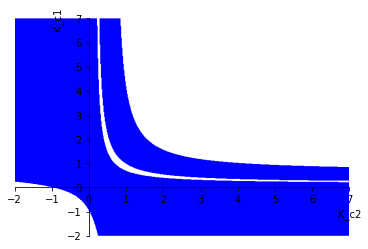

In [16]:
sympy.plot_implicit(requirements, (K_c2, -2, 7), (K_c1, -2, 7))